In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [227]:
data = "eval/eval_similarity.csv"
name = data.replace("eval/eval_", "").replace(".csv", "")
# print(name)

data_rr = "eval/eval_similarity_rr.csv"
name_rr = data_rr.replace("eval/eval_", "").replace(".csv", "")
# print(name_rr)

In [228]:
df = pd.read_csv(data, on_bad_lines="skip")
df = df[df['respuesta generada'] != 'No lo sé.']
name += "_cleaned"

df_rr = pd.read_csv(data_rr, on_bad_lines="skip")
df_rr = df_rr[df_rr['respuesta generada'] != 'No lo sé.']
name_rr += "_cleaned"

In [229]:
# df.head(10)

In [230]:
# df_rr.head(10)

In [231]:
scores_columns = ["accuracy", "faithfulness", "groundedness", "relevance"]

scores_df = round(df[scores_columns].mean(),2)
scores_df = scores_df.to_frame().transpose()
scores_df.index = ["Sin reranking"]

scores_df_rr = round(df_rr[scores_columns].mean(),2)
scores_df_rr = scores_df_rr.to_frame().transpose()
scores_df_rr.index = ["Con reranking"]

combined_scores = pd.concat([scores_df, scores_df_rr])
print(combined_scores)

               accuracy  faithfulness  groundedness  relevance
Sin reranking      2.95          4.56          4.44       3.74
Con reranking      3.00          4.56          4.54       4.49


In [232]:
%matplotlib inline

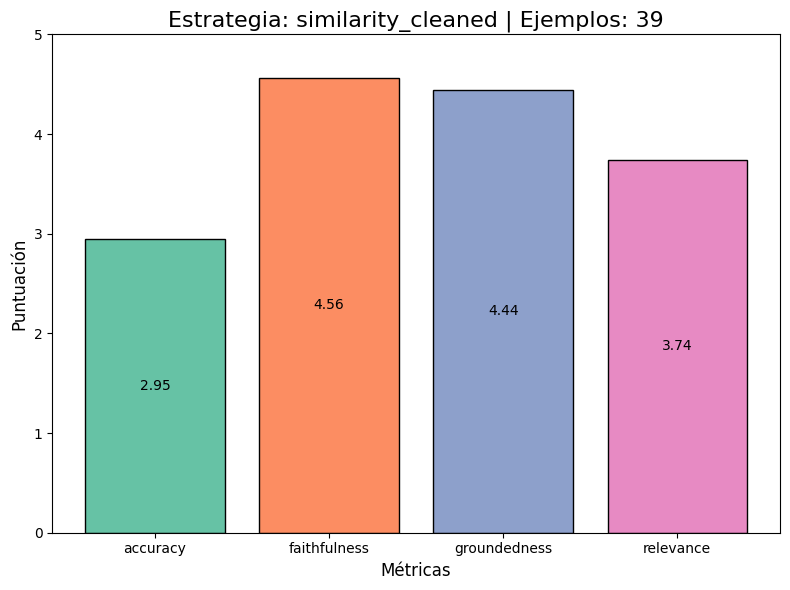

In [233]:
# Transponer el DataFrame para facilitar el plot
data = scores_df.transpose()
data.columns = ["Puntuación"]

# Colores distintos para cada barra
colors = sns.color_palette("Set2", n_colors=len(data))

# Crear la figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
bars = plt.bar(data.index, data["Puntuación"], color=colors, edgecolor='black')

# Añadir etiquetas centradas dentro de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f"{height:.2f}",
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

num_rows = len(df)

# Personalizar la gráfica
plt.title(f"Estrategia: {name} | Ejemplos: {num_rows}", fontsize=16)
plt.xlabel("Métricas", fontsize=12)
plt.ylabel("Puntuación", fontsize=12)
plt.ylim(0, 5)
plt.xticks(rotation=0)  
plt.tight_layout()

# Guardar y mostrar la gráfica
plt.savefig(f"images/eval_{name}.png", dpi=300, bbox_inches="tight")
plt.show()

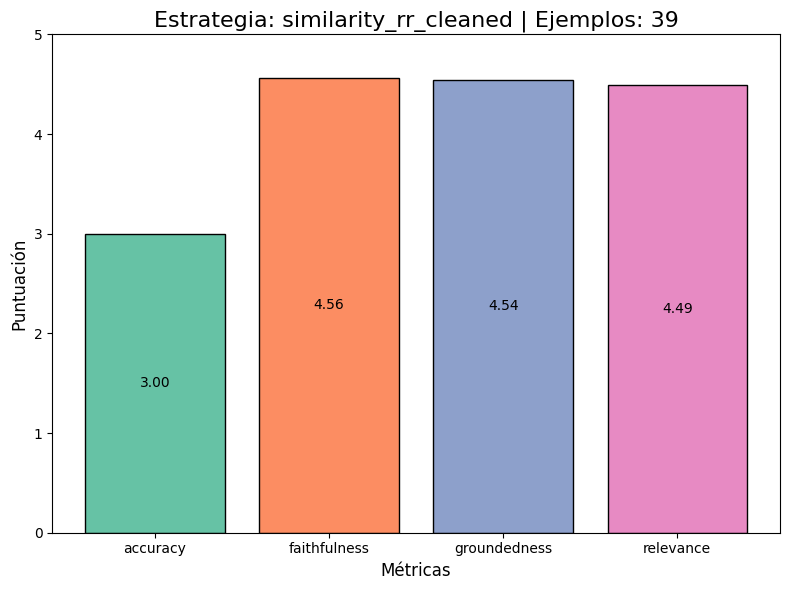

In [234]:
# Transponer el DataFrame para facilitar el plot
data = scores_df_rr.transpose()
data.columns = ["Puntuación"]

# Colores distintos para cada barra
colors = sns.color_palette("Set2", n_colors=len(data))

# Crear la figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
bars = plt.bar(data.index, data["Puntuación"], color=colors, edgecolor='black')

# Añadir etiquetas centradas dentro de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f"{height:.2f}",
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

num_rows = len(df_rr)

# Personalizar la gráfica
plt.title(f"Estrategia: {name_rr} | Ejemplos: {num_rows}", fontsize=16)
plt.xlabel("Métricas", fontsize=12)
plt.ylabel("Puntuación", fontsize=12)
plt.ylim(0, 5)
plt.xticks(rotation=0)  
plt.tight_layout()

# Guardar y mostrar la gráfica
plt.savefig(f"images/eval_{name_rr}.png", dpi=300, bbox_inches="tight")
plt.show()